In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#first i will define the functions
#the first function is the real valued Morleigh Wavelet

def creatRealWavelet(time, freq, fwhm): 
#fwhm stands for full width and half maximum, it is the
#formal term for the gusssian width (w)


#there are two parts of the equation, the first part is the
#cosine part while the second part is the gaussian part

#first part
    cosinepart = np.cos(2*np.pi*freq*time)
#thegaussian part
    gauspart = np.exp((-4*np.log(2)*time**2)/(fwhm**2))
    return cosinepart*gauspart


#Here i created the function for the complex wavelet, which is what i worked with
def creatComplexWavelet(time, freq, fwhm): 
    complexpart = np.exp(1j*2*np.pi*freq*time)
    gauspart = np.exp((-4*np.log(2)*time**2)/(fwhm**2))
    return complexpart*gauspart


In [24]:
#parameters 
freq = 5
fwhm = .5
sampling_rate = 500  #the sampling rate tells us how many points there are in a second
time = np.arange(-2*sampling_rate, 2*sampling_rate+ 1/sampling_rate)/sampling_rate
#time above is set to be from -2 to +2 but it has to be in units of samplingrate

ntimepoints = len(time) #this variable tells us the length of time

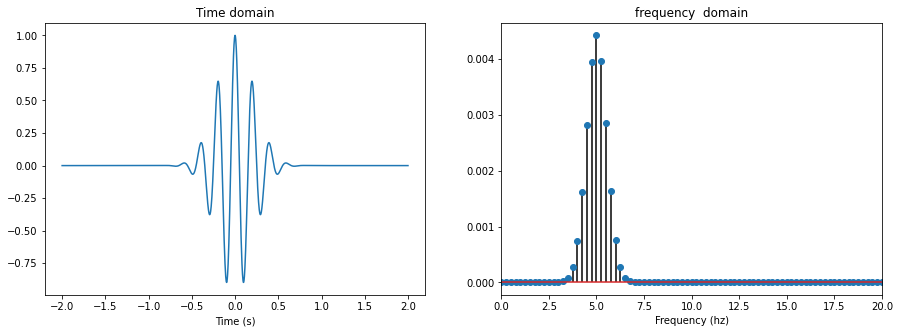

In [21]:
#create my wavelet
wavelet = creatRealWavelet(time, freq, fwhm)


#get the power spectrum of the wavelet
waveletX = np.abs(np.fft.fft(wavelet/ntimepoints))**2

hz = np.linspace(0, sampling_rate/2, int(ntimepoints/2+1))

# creat a figure with 1x2 subplot geometry
fig,ax = plt.subplots(1,2, figsize =(15,5))



ax[0].plot(time,wavelet)
ax[0].set_xlabel('Time (s)')
ax[0].set_title('Time domain')


ax[1].stem(hz, waveletX[: len(hz)], 'k')
ax[1].set_xlabel('Frequency (hz)')
ax[1].set_xlim([0,20])
ax[1].set_title('frequency  domain')


plt.show()                                                                 #250 hertz is the nyquist freguency

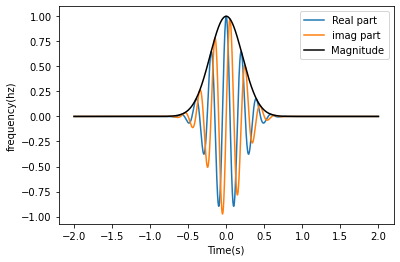

In [51]:
# this is for the complex wavelets
wavelet = creatComplexWavelet(time, freq, fwhm)

plt.plot(freq, np.real(wavelet), label = 'Real part')
plt.plot(freq, np.imag(wavelet), label = 'imag part')
plt.plot(freq, np.abs(wavelet),'k', label = 'Magnitude')
plt.legend()
plt.xlabel('Time(s)')
plt.ylabel('frequency(hz)')

plt.show()

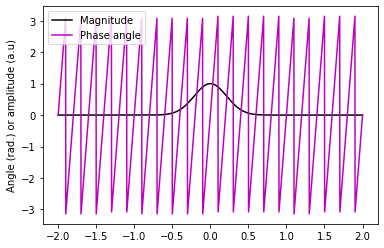

In [30]:
# to plot the magnitude and the frequenct time series

plt.plot(time, np.abs(wavelet),'k', label = 'Magnitude') # this is the magnitude
plt.plot(time, np.angle(wavelet), 'm', label ='Phase angle')
plt.legend()
plt.ylabel('Angle (rad.) or amplitude (a.u)')     #a.u stands for arbitrary units
plt.show() 


#the magnitude has unit of amplitude while the phase has units of radians 

CREATE A WAVELET FAMILY

In [62]:
# i will create the wavelet parameters

#define parameters
lowfrequency =  2
highfrequency = 80
numfrequency =  42


#to define the range of frequency
frex = np.linspace(lowfrequency, highfrequency, numfrequency)
fwhms = np.linspace(4,1, numfrequency)

In [1]:
#to create the wavelet family


#first of all initialize the waveletfamily
waveletfamily = np.zeros((numfrequency, ntimepoints), dtype = complex)

for wi in range(numfrequency):
    waveletfamily[wi, :] = creatComplexWavelet(time, frex[wi], fwhms[wi])
    
    
#checking the plots
plt.plot(time,waveletfamily[5,:])

#inorder to extract the real part
plt.plot(time, np.real(waveletfamily[5, :]))


#to determine the frequency at the fifth row 
plt.title(str(frex[5]))   # from the graph below it is 11 hertz

NameError: name 'np' is not defined

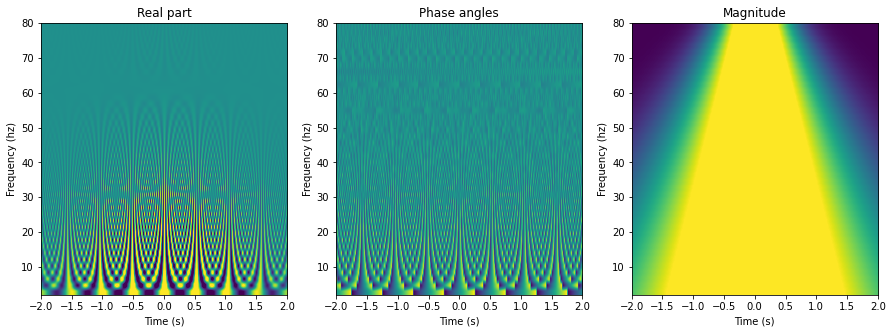

'\nNote that the each row in the plot corresponds to the line plots that i have produced during \nthe plots of the Real, Phase, Magnitude\n\n\nTHE BLUE MEANS NEGATIVE WHILE TO YELLOW SIGNIFIES POSSITIVE'

In [65]:
#to make the images of the three wavelet parts 

fig, ax = plt.subplots(1,3, figsize = (15,5))

#show the real part of the wavelet family
ax[0].imshow(np.real(waveletfamily), aspect = 'auto', origin = 'lower',
            extent=[time[0], time[-1], lowfrequency, highfrequency],
            vmin = -.7, vmax = .7)  
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Frequency (hz)')
ax[0].set_title('Real part')


#show the phase angles of the wavelet family
ax[1].imshow(np.angle(waveletfamily), aspect = 'auto', origin = 'lower',
            extent=[time[0], time[-1], lowfrequency, highfrequency],
            vmin = -3, vmax = 3)  
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Frequency (hz)')
ax[1].set_title('Phase angles')



#show the magnitude of the wavelet family
ax[2].imshow(np.abs(waveletfamily), aspect = 'auto', origin = 'lower',
            extent=[time[0], time[-1], lowfrequency, highfrequency],
            vmin = 0, vmax = .7)  
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Frequency (hz)')
ax[2].set_title('Magnitude')

 

plt.show()

'''
Note that the each row in the plot corresponds to the line plots that i have produced during 
the plots of the Real, Phase, Magnitude


THE BLUE MEANS NEGATIVE WHILE TO YELLOW SIGNIFIES POSSITIVE'''

In [78]:
from scipy.io import loadmat
import pandas as pd
EEG = pd.("sampleEEGdata.mat")

FileNotFoundError: [Errno 2] No such file or directory: 'sampleEEGdata.mat'